1. Набор $(s_0,a_0,s_1,a_1,s_2,a_2,...)$ наз. траекторией
2. Для данной среды, политики $\pi$ и нач. сост. $s_0\in S$ распределение, из кот. приходят траектории $\tau$, наз. распределением траекторий:
$$p(\tau)=p(s_0,a_0,s_1,a_1,s_2,a_2,...)=\prod_{t\geq0}\pi(a_t|s_t)p(s_{t+1}|s_t, a_t)$$
3. Мат. ож. по траекториям $\mathbb{E}_\tau(\cdot):=\mathbb{E}_{\pi(a_0|s_0)}\mathbb{E}_{\pi(s_1|s_0, a_0)}\mathbb{E}_{\pi(a_1, s_1)}...(\cdot)$

# Policy Gradient подход

__Замечание__:  
$$\nabla_\theta\log q(x|\theta)=\frac{\nabla_\theta q(x|\theta)}{q(x|\theta)}$$
Сосред. на методах, кот. непосредственно опр. политику агента.

Важное достоинство таких методов: они применимы также к непрер. действиям.

Предп., что состояние среды описывается вектором n вещ. чисел, а действия дискретны

Будем аппр. функцию политики $\pi_\theta(a|s)$ нейронной сетью.
- с параметрами $\theta$
- с n входами
- m выходами, на кот. находятся вероятности каждого из m действий

Для обучения сети необх. обучающие данные $s^k,\pi^k$, k=1...N, где $s^k$ - n-мерный вектор для k-ого примера, а $\pi^k=(p_1,..,p_m)^k$ - нормированный на 1 неотр. m-мерный вектор.

Возьмём нач. ф-ию $\pi_\theta(a|s)$ со случ. иниц-ыми параметрами. С тек. функцией политики проведём M эпизодов, вычисляя в каждом получаемое суммарное вознашраждение R. На основе этой информации сформируем обуч. данные в виде троек $(s_t, a_t, R)$, где в данном эпизоде во всех тройках одинаковый R.

Каждую тройку $(s, a, R)$ из нескольких эпизодов будем нумеровать индексом k. При обучении минимизируется сумма:
$$L=-\sum_iR^k\log p^k, p^k=\pi_\theta(a^k|s^k)$$
где $p^k$ вероятность действия $a^k$. Таким образом, при прямом распространении на вход сети подаётся пример $s^k$, на выходе получается распределение выроятностей $(p_1,...,p_m)^k$. Из этих вероятностей выбирается та, которая соотв. сделанному в примере действию $a^k$.

Т.к. $\log p$

Будем считать, что награда на каждом шаге зависит от текущего состояния среды $r_t=r(s_t)$. Макс. сумм. награда в течении эпизода (T - время попадания в терминальное состояние):
$$R(\tau)=r_1+r_2+r_3+...+r_T$$
Эта награда реализуется на кокр. траектории $\tau=(s_0,a_0,s_1,a_1,s_2,a_2,..,s_{T-1},a_{T-1},s_T)$ и зависит от политики агента $\pi_\theta(a|s)$ с параметрами $\theta$. Вероятность траектории определяется распределением нач. состояния $p(s_0)$, усл. вероятностями политики $\pi_\theta(a|s)$ и моделью среды $p(s'|s,a)$:
$$p_\theta(\tau)=p(s_0)\prod^{T-1}_{t=0}\pi_\theta(a_t|s_t)p(s_{t+1}|s_t,a_t)$$
Уравнение по всем траекториям имеет вид:
$$R=\mathbb{E}_{r\sim p_\theta(\tau)}R(\tau)=\sum_\tau p_\theta(\tau)\cdot R(\tau)$$
где сумма по r - сумма по всем $\tau=(s_0,a_0,s_1,a_1,s_2,a_2,..,s_{T-1},a_{T-1},s_T)$. Чтобы макс. это выражение при помощи градиентного метода необходимо вычислить градиент $\nabla_\theta R$ по параметрам $\theta$ модели политики $\pi_\theta(s,a).$ Запишем логарифм вероятности траектории и возьмем его градиент:
$$\log p_\theta(\tau)=\sum^{T-1}_{t=0}\log\pi_\theta(a_t|s_t)+[не~зависит~от~\theta]\Rightarrow\nabla_\theta p_\theta(\tau)=p_\theta(\tau)\sum^{T-1}_{t=0}\nabla\log \pi_\theta(a_t,s_t)$$

Таким образом:
$$\nabla_\theta R=\sum_\tau p_\theta(\tau)R(\tau)\sum^P{T-1}_{t=0}\nabla\log\pi_\theta(a_t,s_t)$$
Если модель среды $p(s'|s,a)$ неизвестна, градиент оценивается по методу Монте-Карло:
$$\nabla_\theta R=\frac{1}{N}\sum^N_{k=1}\sum^{T_k-1}_{t=0}R^k\nabla\log\pi_\theta(a^k_t,s^k_t)$$
где $R^k$ - награда, полученная в k-м эпизоде, а a^k_t,s^k_t - значения состояния и действия, полученные в k-м эпизоде на временном шаге t. Проблемы такой оценки связаны с:
- количество возм. траекторий огромно, поэтому требуется очень много выборочных траекторий для оценки целевой функции. Это приводит к высокой дисперсии в оценке градиента.
- для стабильности обучения в веса политики можно вносить только небольшие изменения на каждой итерации.

# REINFORCE

__Среда CartPole__

Состояние:
- положение тележки: [-2.4, 2.4], эпизод завершается при выходе за пределы
- скорость тележки
- угол наклона; если выходит из [-0.209, 0.209], то эпизод завершается
- скорость верхнего стержня

In [67]:
from pyvirtualdisplay import Display
from typing import *
import torch
import gym
import matplotlib.pyplot as plt

In [5]:
env = gym.make("CartPole-v0", render_mode="rgb_array")

/home/andrew/Projects/2023_1/machine_learning/lib/python3.10/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


In [3]:
env.reset()

(array([ 0.01485905, -0.02204885,  0.01792712,  0.03240047], dtype=float32),
 {})

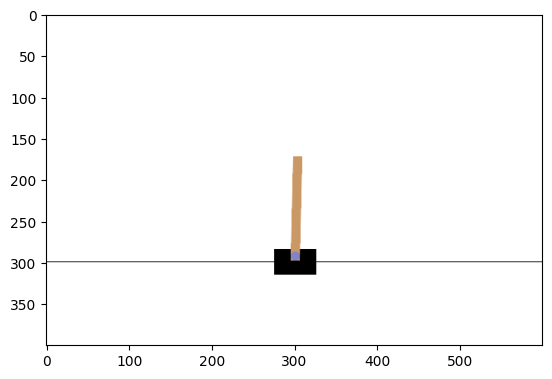

In [4]:
plt.imshow(env.render());

In [187]:
import torch
import torch.nn as nn
from typing import *
from typing_extensions import Self

In [188]:
class PolicyNetwork:
    def __init__(self, n_state: int, n_actions: int, n_hidden: int, lr: float = 0.005) -> None:
        self.model = nn.Sequential(
            nn.Linear(n_state, n_hidden),
            nn.ReLU(),
            nn.Linear(n_hidden, n_actions),
            nn.Softmax()
        )
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr)
    
    def predict(self, s) -> Any:
        # print(s)
        # print(self.model(torch.Tensor(s)))
        return self.model(torch.Tensor(s))
    
    def update(self, returns, log_probs) -> Self:
        policy_gradient = []
        for log_prob, Gt, in zip(log_probs, returns):
            policy_gradient.append(-log_prob * Gt)
        loss = torch.stack(policy_gradient).sum()
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
    
    def get_action(self, s) -> tuple:
        probs = self.predict(s)
        action = torch.multinomial(probs, 1).item()
        log_prob = torch.log(probs[action])
        return action, log_prob

In [189]:
def reinforce(env: gym.Env, estimator: PolicyNetwork, n_episodes: int, gamma: float = 1.0) -> Any:
    for episode in range(n_episodes):
        print(episode)
        log_probs = []
        rewards = []
        state = env.reset()[0]
        while True:
            action, log_prob = estimator.get_action(state)
            next_state, reward, is_done, is_truncated, _ = env.step(action)

            total_reward_episode[episode] += reward
            log_probs.append(log_prob)
            rewards.append(reward)

            if is_truncated or is_done:
                returns = []
                Gt = 0
                pw = 0

                for reward in rewards[::-1]:
                    Gt += gamma ** pw * reward
                    pw += 1
                    returns.append(Gt)
                
                returns = returns[::-1]
                returns_amount = len(returns)
                returns = torch.tensor(returns)
                returns = (returns - returns.mean()) / (returns.std() + 1e-9)
                returns.resize_(returns_amount, 1)

                estimator.update(returns, log_probs)
                print(episode, total_reward_episode[episode])
                break
        
        state = next_state

In [190]:
n_state = env.observation_space.shape[0]
n_action = env.action_space.n
n_hidden = 128
lr = .003
policy_net = PolicyNetwork(n_state, n_action, n_hidden, lr)

In [191]:
n_episodes = 1500
gamma = 0.9
total_reward_episode = [0] * n_episodes

In [ ]:
reinforce(env, policy_net, n_episodes, gamma)

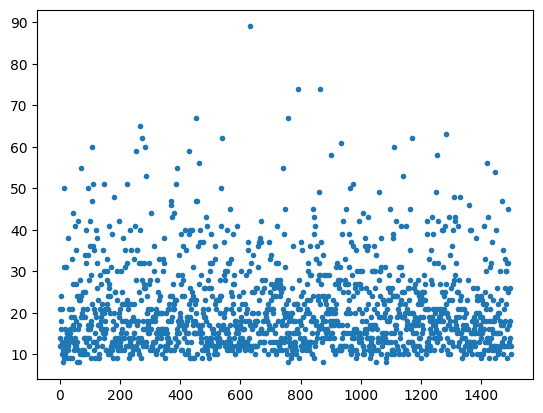

In [193]:
plt.plot(total_reward_episode, ".");


In [194]:
env.close()

In [237]:
class PolicyNetwork:
    def __init__(self, n_state: int, n_actions: int, n_hidden: int, lr: float = 0.005) -> None:
        self.model = nn.Sequential(
            nn.Linear(n_state, n_hidden),
            nn.ReLU(),
            nn.Linear(n_hidden, n_actions),
            nn.Softmax()
        )
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr)
    
    def predict(self, s) -> Any:
        # print(s)
        # print(self.model(torch.Tensor(s)))
        return self.model(torch.Tensor(s))
    
    def update(self, returns, log_probs) -> None:
        policy_gradient = []
        for log_prob, Gt, in zip(log_probs, returns):
            policy_gradient.append(-log_prob * Gt)
        loss = torch.stack(policy_gradient).sum()
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
    
    def get_action(self, s) -> tuple:
        probs = self.predict(s)
        action = torch.multinomial(probs, 1).item()
        log_prob = torch.log(probs[action])
        return action, log_prob

In [270]:
from torch.autograd import Variable

class ValueNetwork:
    def __init__(self, n_state: int, n_hidden: int = 50, lr: float = .05) -> None:
        self.criterion = nn.MSELoss()
        self.model = nn.Sequential(
            nn.Linear(n_state, n_hidden),
            nn.ReLU(),
            nn.Linear(n_hidden, 1)
        )
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr)
    
    def update(self, s, y) -> None:
        y_pred = self.model(torch.tensor(s))
        loss = self.criterion(y_pred, Variable(torch.Tensor(y)))
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
    
    def predict(self, s) -> Any:
        with torch.no_grad():
            return self.model(torch.Tensor(s))

In [271]:
def reinforce(env: gym.Env, estimator_policy: PolicyNetwork, estimator_value: ValueNetwork, n_episodes: int, gamma: float = 1.0) -> Any:
    for episode in range(n_episodes):
        log_probs = []
        states = []
        rewards = []
        state = env.reset()[0]
        while True:
            states.append(state)
            action, log_prob = estimator_policy.get_action(state)
            next_state, reward, is_done, is_truncated, _ = env.step(action)

            total_reward_episode[episode] += reward
            log_probs.append(log_prob)
            rewards.append(reward)

            if is_truncated or is_done:
                returns = []
                Gt = 0
                pw = 0

                for reward in rewards[::-1]:
                    Gt += gamma ** pw * reward
                    pw += 1
                    returns.append(Gt)
                
                returns = returns[::-1]
                returns_amount = len(returns)

                returns = torch.tensor(returns)
                baseline_values = estimator_value.predict(states)
                advantages = returns - baseline_values
                returns.resize_(returns_amount, 1)

                estimator_value.update(states, returns)
                estimator_policy.update(advantages, log_probs)

                # print(episode, total_reward_episode[episode])
                break
        
        state = next_state

In [272]:
n_state = env.observation_space.shape[0]
n_action = env.action_space.n
n_hidden = 10
lr = .001
policy_net = PolicyNetwork(n_state, n_action, n_hidden, lr)
value_net = ValueNetwork(n_state, n_hidden, lr)

In [273]:
n_episodes = 1000
gamma = 0.9
total_reward_episode = [0] * n_episodes

In [274]:
reinforce(env, policy_net, value_net, n_episodes, gamma)

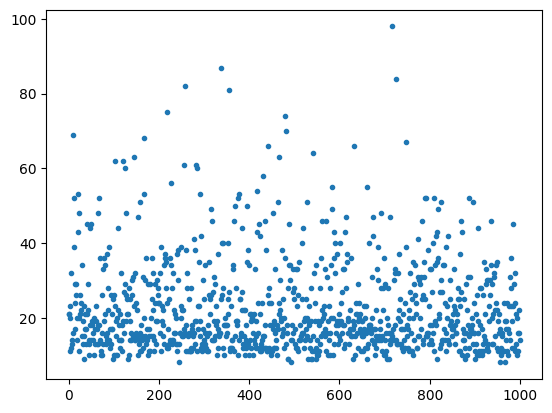

In [275]:
plt.plot(total_reward_episode, ".")


# Реализация алгоритма Исполнитель-Критик

- Исполнитель. Принимает входное состояние и выводит вероятности действий, обучает оптимальную стратегию, обновляя модель с помощью инф., пред. критиком;
- Критик. Оценивает, насколько хорошо оказаться во входном состоянии, вычисляя функции ценности. Ценность состояния подск. исполнителю, что он должен подправить.

У этих компонентов общие входной и скрытый слой. Функция потерь представляет собой сумму 2-х слагаемых:
- отрицательного лог. правдоподобия действия, которое оценивает качество исполнителя;
- среднеквадратической ошибки между оценкой и вычислительным значением дохода

Более...**

In [212]:
env = gym.make("CartPole-v0", render_mode="rgb_array")

/home/andrew/Projects/2023_1/machine_learning/lib/python3.10/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


In [213]:
import torch.nn.functional as F

sdfsdf

In [214]:
class ActorCriticModel(nn.Module):
    def __init__(self, n_input: int, n_output: int, n_hidden: int) -> None:
        super(ActorCriticModel, self).__init__()
        self.fc = nn.Linear(n_input, n_hidden)
        self.action = nn.Linear(n_hidden, n_output)
        self.value = nn.Linear(n_hidden, 1)
    
    def forward(self, x: int) -> tuple[torch.Tensor, torch.Tensor]:
        x = torch.Tensor(x)
        x = F.relu(self.fc(x))
        action_probs = F.softmax(self.action(x), dim=-1)
        state_value = self.value(x)
        return action_probs, state_value

Через интерфейс torch.optim.lr...

In [215]:
class PolicyNetwork:
    def __init__(self, n_state: int, n_actions: int, n_hidden: int, lr: float = 0.001) -> None:
        self.model = ActorCriticModel(n_state, n_action, n_hidden)
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr)
        self.scheduler = torch.optim.lr_scheduler.StepLR(self.optimizer, step_size=10, gamma=0.9)
    
    def predict(self, s: Any) -> Any:
        return self.model(torch.tensor(s))
    
    def update(self, returns, log_probs, state_values) -> None:
        loss = 0
        for log_prob, value, Gt in zip(log_probs, state_values, returns):
            advantage = Gt - value.item()
            policy_loss = -log_prob * advantage
            value_loss = F.smooth_l1_loss(value, Gt)
            loss += policy_loss + value_loss
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
    
    def get_action(self, s) -> tuple:
        action_probs, state_value = self.predict(s)
        action = torch.multinomial(action_probs, 1).item()
        log_prob = torch.log(action_probs[action])
        return action, log_prob, state_value

In [226]:
def actor_critic(env: gym.Env, estimator: PolicyNetwork, n_episode: int, gamma: float = 1.0) -> None:
    for episode in range(n_episode):
        # print(episode, flush=True)
        log_probs = []
        rewards = []
        state_values = []

        state = env.reset()[0]
        while True:
            action, log_prob, state_value = estimator.get_action(state)
            next_state, reward, is_done, is_truncated, _ = env.step(action)
            total_reward_episode[episode] += reward
            log_probs.append(log_prob)
            state_values.append(state_value)
            rewards.append(reward)

            if is_truncated or is_done:
                returns = []
                Gt = 0
                pw = 0
                for reward in rewards[::-1]:
                    Gt += gamma ** pw * reward
                    returns.append(Gt)
                    pw += 1
                returns = returns[::-1]
                returns_amount = len(returns)
                returns = torch.tensor(returns)
                returns = (returns - returns.mean()) / (returns.std() + 1e-9)
                returns.resize_(returns_amount, 1)
                estimator.update(returns, log_probs, state_values)
                if total_reward_episode[episode] >= 195:
                    estimator.scheduler.step()
                break

            state = next_state

In [227]:
n_state = env.observation_space.shape[0]
n_action = env.action_space.n
n_hidden = 500
lr = 0.001
policy_net = PolicyNetwork(n_state, n_action, n_hidden, lr)

In [228]:
n_episodes = 500
gamma = .9
total_reward_episode = [0] * n_episodes

In [229]:
actor_critic(env, policy_net, n_episodes, gamma)

(0.0, 210.0)

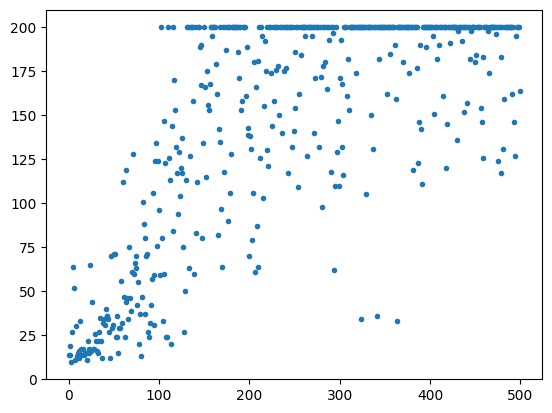

In [230]:
plt.plot(total_reward_episode, ".")
plt.ylim(bottom=0, top=210)

In [276]:
env.close()

In [277]:
class ActorCriticModel(nn.Module):
    def __init__(self, n_input: int, n_output: int, n_hidden: List[int]) -> None:
        super(ActorCriticModel, self).__init__()
        self.fc1 = nn.Linear(n_input, n_hidden[0])
        self.fc2 = nn.Linear(n_hidden[0], n_hidden[1])
        self.action = nn.Linear(n_hidden[1], n_output)
        self.value = nn.Linear(n_hidden[1], 1)
    
    def forward(self, x: int) -> tuple[torch.Tensor, torch.Tensor]:
        x = torch.Tensor(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        action_probs = F.softmax(self.action(x), dim=-1)
        state_value = self.value(x)
        return action_probs, state_value

In [278]:
class PolicyNetwork:
    def __init__(self, n_state: int, n_actions: int, n_hidden: int, lr: float = 0.001) -> None:
        self.model = ActorCriticModel(n_state, n_action, n_hidden)
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr)
        self.scheduler = torch.optim.lr_scheduler.StepLR(self.optimizer, step_size=10, gamma=0.9)
    
    def predict(self, s: Any) -> Any:
        return self.model(torch.tensor(s))
    
    def update(self, returns, log_probs, state_values) -> None:
        loss = 0
        for log_prob, value, Gt in zip(log_probs, state_values, returns):
            advantage = Gt - value.item()
            policy_loss = -log_prob * advantage
            value_loss = F.smooth_l1_loss(value, Gt)
            loss += policy_loss + value_loss
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
    
    def get_action(self, s) -> tuple:
        action_probs, state_value = self.predict(s)
        action = torch.multinomial(action_probs, 1).item()
        log_prob = torch.log(action_probs[action])
        return action, log_prob, state_value

In [283]:
def actor_critic(env: gym.Env, estimator: PolicyNetwork, n_episode: int, gamma: float = 1.0) -> None:
    for episode in range(n_episode):
        print(episode, flush=True)
        log_probs = []
        rewards = []
        state_values = []

        state = env.reset()[0]
        print(state)
        while True:
            #one_hot_state = [0] * 48
            #one_hot_state[state] = 1
            action, log_prob, state_value = estimator.get_action(state)
            next_state, reward, is_done, is_truncated, _ = env.step(action)
            total_reward_episode[episode] += reward
            log_probs.append(log_prob)
            state_values.append(state_value)
            rewards.append(reward)

            if is_truncated or is_done:
                returns = []
                Gt = 0
                pw = 0
                for reward in rewards[::-1]:
                    Gt += gamma ** pw * reward
                    returns.append(Gt)
                    pw += 1
                returns = returns[::-1]
                returns_amount = len(returns)
                returns = torch.tensor(returns)
                returns = (returns - returns.mean()) / (returns.std() + 1e-9)
                returns.resize_(returns_amount, 1)
                estimator.update(returns, log_probs, state_values)
                if total_reward_episode[episode] >= 195:
                    estimator.scheduler.step()
                break

            state = next_state

In [284]:
n_state = env.observation_space.shape[0]
n_action = env.action_space.n
n_hidden = [128, 32]
lr = 0.03
policy_net = PolicyNetwork(n_state, n_action, n_hidden, lr)

In [285]:
n_episodes = 1000
gamma = .9
total_reward_episode = [0] * n_episodes

In [ ]:
actor_critic(env, policy_net, n_episodes, gamma)

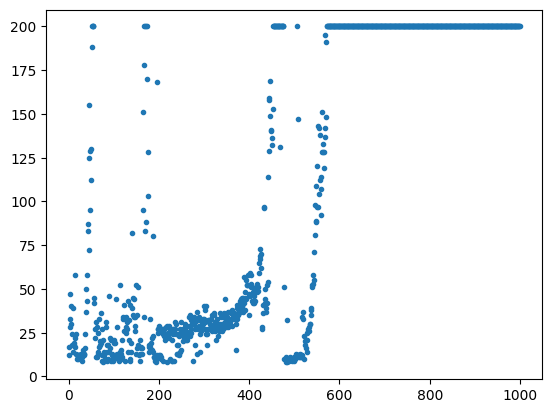

In [287]:
plt.plot(total_reward_episode, ".")
# plt.ylim(bottom=0, top=210)

# Метод перекрестной энтропии для CartPole

In [178]:
import gym
import torch
import torch.nn as nn
from typing import *
import matplotlib.pyplot as plt

In [179]:
env = gym.make("CartPole-v0", render_mode="rgb_array")

/home/andrew/Projects/2023_1/machine_learning/lib/python3.10/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


In [180]:
class Estimator:
    def __init__(self, n_state: int, lr: float = 0.001) -> None:
        self.model = nn.Sequential(
            nn.Linear(n_state, 1),
            nn.Sigmoid()
        )
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr)
        self.criterion = nn.BCELoss()
    
    def predict(self, state: list) -> torch.Tensor:
        return self.model(torch.Tensor(state))

    def update(self, state: list, y: list) -> None:
        y_pred = self.predict(state)
        # print(torch.Tensor(y).shape, y_pred.shape)
        loss = self.criterion(y_pred.squeeze(), torch.Tensor(y))
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

In [181]:
def cross_entropy(env: gym.Env, estimator: Estimator, n_episodes: int, n_samples: int) -> None:
    data = []
    for episode in range(n_episodes):
        rewards = 0
        actions = []
        states = []

        state = env.reset()[0]
        while True:
            action = env.action_space.sample()
            next_state, reward, is_done, is_truncated, _ = env.step(action)
            # print(env.__dict__["_elapsed_steps"])
            actions.append(action)
            states.append(state)
            rewards += reward

            if is_truncated or is_done:
                for state, action in zip(states, actions):
                    data.append((rewards, state, action))
                break
            state = next_state
    
    data.sort(key=lambda value: value[0], reverse=True) # reward
    samples = data[:n_samples]
    train_data_states = [item[1] for item in samples]
    train_data_actions = [item[2] for item in samples]

    for _ in range(100):
        estimator.update(train_data_states, train_data_actions)

In [182]:
n_states = env.observation_space.shape[0]
estimator = Estimator(n_states, 0.1)

In [183]:
n_episodes = 1000
n_samples = 1000

In [184]:
cross_entropy(env, estimator, n_episodes, n_samples)

In [185]:
total_reward_episode = [0] * n_episodes
for episode in range(n_episodes):
    state = env.reset()[0]
    while True:
        action = 1 if estimator.predict(state) >= .5 else 0
        next_state, reward, is_done, is_truncated, _ = env.step(action)
        # print(env.__dict__["_elapsed_steps"], tr, info)
        total_reward_episode[episode] += 1
        if is_truncated or is_done:
            break
        state = next_state

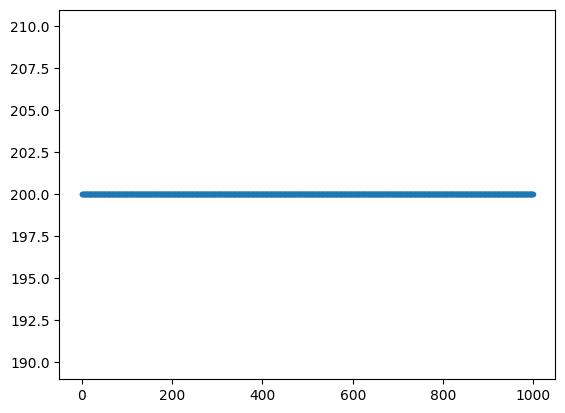

In [186]:
plt.plot(total_reward_episode, ".")

# Непрерывная окружающая среда

Пусть $\exists$ m-компонентный вектор действия с вещю элементами. Будем считать, что вероятность m компоненты описывается нормальным распределением. Тогда политика:
$$\pi(a|s)=\prod^m_{k=1}\frac{1}{\sqrt{2\pi D_k}}e^{-\frac{(a_k-\mu_k)^2}{2D_k}}$$

Будем учить сеть получать средние значения $\mu_k$ и дисперсии $D_k-\sigma^2_k$. Соответственно логарифм ф-ии политики:
$$\log\pi(a|s)=-\sum^m_{k=1}\left[\frac{(a_k-\mu_k)^2}{2D_k}+\log\sqrt{2\pi D_k}\right]\cdot$$

![](./1709544769583.webp)

Continuous Mountain Car - среда с непрерывными действиями, прин. знач. от -1 до 1. Цель - доехать на машине до вершины горы, расп. справа.

Действие предст. числом с пл. точкой

- Дисперсии $D_k > 0 \Rightarrow$ на выходе Softplus $...$
- ...
- ...

In [1]:
import gym
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [11]:
from typing import *
from typing_extensions import Self

In [2]:
env = gym.make("MountainCarContinuous-v0", render_mode="rgb_array")

In [4]:
env.observation_space.shape

(2,)

In [5]:
env.action_space.shape

(1,)

In [8]:
env.action_space.low[0], env.action_space.high[0]

(-1.0, 1.0)

In [9]:
env.reset()

(array([-0.48099074,  0.        ], dtype=float32), {})

In [10]:
env.step(env.action_space.sample())

(array([-0.48164323, -0.00065252], dtype=float32),
 -0.004952848470365923,
 False,
 False,
 {})

In [33]:
class ActorCriticModel(nn.Module):
    def __init__(self, n_input: int, n_output: int, n_hidden: int) -> None:
        super(ActorCriticModel, self).__init__()
        self.fc = nn.Linear(n_input, n_hidden)
        self.mu = nn.Linear(n_hidden, n_output)
        self.sigma = nn.Linear(n_hidden, n_output)
        self.value = nn.Linear(n_hidden, 1)
    
    def forward(self, x: torch.Tensor) -> tuple[torch.Tensor, torch.Tensor, torch.Tensor]:
        x = F.relu(self.fc(x))
        mu = F.tanh(self.mu(x))
        sigma = F.softplus(self.sigma(x))
        value = self.value(x)
        return mu, sigma, value

In [39]:
class PolicyNetwork:
    def __init__(self, n_state: int, n_action: int, n_hidden: int, lr: float = 0.001) -> None:
        self.model = ActorCriticModel(n_state, n_action, n_hidden)
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr)
    
    def predict(self, s: list) -> torch.Tensor:
        return self.model(torch.Tensor(s))
    
    def update(self, returns, log_probs, state_values) -> None:
        loss = 0
        for log_prob, value, Gt in zip(log_probs, state_values, returns):
            advantage = Gt - value.item()
            policy_loss = -log_prob * advantage
            value_loss = F.smooth_l1_loss(value, Gt)
            loss += policy_loss + value_loss
            
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def get_action(self, s: list) -> tuple[torch.Tensor, Any, torch.Tensor]:
        mu, sigma, value = self.predict(s)
        dist = torch.distributions.Normal(mu, sigma)
        action = dist.sample()
        log_prob = dist.log_prob(action)
        return action, log_prob, value

In [297]:
def actor_critic(env: gym.Env, estimator: PolicyNetwork, n_episodes: int, gamma=1.) -> None:
    global episode_length
    for episode in range(n_episodes):
        values = []
        log_probs = []
        rewards = []
        state = env.reset()[0]

        while True:
            action, log_prob, value = estimator.get_action(state)
            action = action.clip(env.action_space.low[0], env.action_space.high[0])
            next_state, reward, is_done, is_truncated, _ = env.step(action)
            values.append(value)
            log_probs.append(log_prob)
            rewards.append(reward)
            total_reward_episode[episode] += reward
            episode_length[episode] += 1

            if is_truncated or is_done:
                Gt = 0
                pw = 0
                returns = []

                for reward in rewards[::-1]:
                    Gt += gamma**pw * reward
                    returns.append(Gt)
                    pw += 1
                
                returns = returns[::-1]
                returns_amount = len(returns)
                returns = torch.tensor(returns)
                returns = (returns - returns.mean()) / (returns.std() + 1e-9)
                returns.resize_(returns_amount, 1)
                estimator.update(returns, log_probs, values)
                print(f"Episode: {episode} Total reward: {total_reward_episode[episode]} Episode length: {episode_length[episode]}")
                break

            state = next_state

In [312]:
n_state = env.observation_space.shape[0]
n_action = env.action_space.shape[0]
n_hidden = 128
lr = 0.001
policy_net = PolicyNetwork(n_state, n_action, n_hidden, lr)

In [348]:
n_episodes = 2000
total_reward_episode = [0] * n_episodes
episode_length = [0] * n_episodes
gamma = 0.9

In [ ]:
actor_critic(env, policy_net, n_episodes, gamma)

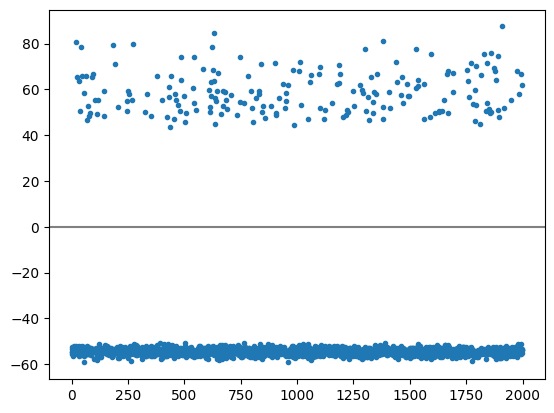

In [350]:
plt.plot(total_reward_episode, ".")
plt.axhline(0, color="gray")

__1 группа методов:__ алгоритмы, которые обучают ф-ию ценности $V(s)$ или ф-ию ценности действий $Q(s,a)$. Ф-ия ценности определяет полное вознаграждение, которое можно получить, стартуя из данного состояния или пары состояние-действие.

Зная ценность, можно выбрать действие, осн. на оценке ценности действий или состояния.
$$\pi(s)=\arg\underset{a}{\max}Q(s,a)$$

Методы на основе ценности в сочетании с глубокими нейронными сетями могут обучиться изощренным стратегиям управления агентом в многомерном пр-ве состояний. Но они испытывают затруднения, когда в задаче очень много действий или пространство действий непрерывно.

__2 группа методов:__ алгоритмы градиента стратегии. В таких контекстах обладают невероятным потенциалом, потому что легко адаптируются к непрерывным пр-вам действий.

# Градиент стратегии

Целью RL явл. максимизация ожидаемого дохода вдоль траектории $\Rightarrow$ целевую ф-ию можно записать в виде:
$$J(\theta)=\mathbb{E}_{\tau\sim\pi_\theta}[R(\tau)]$$
В методах ГС для макс-ии ф-ии исп. её градиент $\nabla_\theta J(\theta)$.

__Теорема о градиенте стратегии__:  
$$\nabla_\theta J(\theta)=\mathbb{E}_{\tau\sim\pi_\theta}[\nabla_\theta\log\pi_\theta(\tau)R(\tau)]=\mathbb{E_{\pi_\theta}}[\nabla_\theta\log\pi_\theta(a|s)Q_{\pi_\theta}(s,a)]$$

Поскольку градиент целевой ф-ии не включает производную распределения состояний, мат. ожидание можно оценить производя выборку из стратегии. Градиент целевой ф-ии можно аппр. след. образом:
$$\nabla_\theta J(\theta)=\frac{1}{N}\sum^N_{i=0}[\nabla_\theta\log\pi_\theta(a_i|s_i)Q_{\pi_\theta}(s_i,a_i)]$$

Идея в увеличении вероятности повторного выбора хороших действий в будущем, одновременно уменьшив вер. плохих действий. Качество действий переносится скалярным выражением $Q_{\pi_\theta}(s_i,a_i)$, опр. качество пары состояние-действие.

Стохастическое обновление с градиентным подъёмом:
$$\theta=\theta+\alpha\nabla_\theta J(\theta)$$

# Алгоритм REINFORСE

$$\nabla_\theta J(\theta)=\mathbb{E_{\pi_\theta}}[\nabla_\theta\log\pi_\theta(a|s)Q_{\pi_\theta}(s,a)]$$

Простой способ, описанный Уильямсом для алгоритма REINFORSE - оценить доход с помощью __метода Монте-Карло__. Поэтому алг. принято относить к алгоритмам Монте-Карло.

Доход Монте-Карло $G_t$ выч. по выборочным траекториям при следовании заданной стратегии.
$$\nabla_\theta J(\theta)=\mathbb{E}_{\pi_\theta}[\nabla_\theta\log\pi_\theta(a|s)Q_{\pi_\theta}(s|a)]=\mathbb{E_{\pi_\theta}}[\nabla_\theta\log\pi_\theta(a_t|s_t)G_t]$$

Доход $G_t$ выч. по полной траектории. т.е. произвести обновление градиента стратегии можно будет после $T-t$ шагов, где T - полное число шагов вдоль траектории.

На практике прим. дисконтированный доход в момент t, который можно также назвать предстоящим вознаграждением, поскольку в нем встреч. только вознаграждения в будущие моменты времени:
$$G_t=\sum^T_{j=t}\gamma^{j-t}r(s_j,a_j)$$

# Алгоритм REINFORCE с базой

В алг. дисперсия увеличивается по мере роста длины траектории из-за стохастической природы стратегии. Пройдя траекториюдо конца, мы будем знать истинное вознаграждение. Но ценность, сопоставления каждой паре состояние-действие ...

$$\nabla_\theta J(\theta)=\mathbb{E_{\pi_\theta}}[\nabla_\theta\log\pi_\theta(a_t|s_t)(G_t-b)]$$
$$b=V^{\pi_\theta}(s_t)$$
Величину $G_t-V^{\pi_\theta}(s_t)$ наз. преимуществом.

Для обучения $V^{\pi_\theta}(s)$ лучше исп. нейронную сеть с оценками Монте-Карло:
$$V^{\pi_\theta}_w(s)\approx\sum^T_{j=t}\gamma^{j-t}r(s_j,a_j)$$

Нейронная сеть обуч. на данных тех же траектроий, что исп. для обучения $\pi_\theta$, дополнительное взаимодействие с окрю средой не нужно. Оценки $G_t$ становятся целевыми значениями, и нейроная сеть для $V(s)$ обуч. так, чтобы минимизировать среднеквадр. ошибку как при обучении с учителем:

$$L(w)=\frac{1}{2}\sum_i\left(V^{\pi_\theta}_w(s_i)-y_i\right)^2$$

w - веса нейронной сети, аппр. ф-ию ценности, а каждый элемент набора данных сод. сост. $s_i$ и целевое значение $y_i=\sum^T_{j=t}\gamma^{j-t}r(s_j,a_j)$

Обновление REINFORCE с базой: $$\theta=\theta+\alpha(G_t-V^{\pi_\theta}_w(s))\nabla_\theta\log\pi_\theta(a_t|s_t)$$

В алгоритме Актор-Критик:  
Исполнитель - стратегия, критик - ф-ия ценности.

У методов AC главное достоинство - способность к обучению в неэпизодических задачах.

__Бутстрэппинг__ - оценка ценности состояния улучшается в рез. использования ожидаемой ценности след. состояний. Вместо того, чтобы исп. полный доход, накопленный на всей траектории, мы огр. непосредств. вознаграждением и оценкой ценности след. состояния.

Функция ценности действий с одношаговым бутстрэппингом опр.:
$$Q(s,a)=r+\gamma V(s')$$
где $s'$ - след. состояние.  
Если $\pi_\theta$ - исполнитель, а $V_w$ - критик, то получается такой шаг обновления:
$$\theta=\theta+\alpha(r_t+\gamma V^{\pi_\theta}_w(s'_t)-V^{\pi_\theta}_w(s))\nabla_\theta\log\pi_\theta(a_t|s_t)$$
в алгоритме REINFORSE с базой
$$\theta=\theta+\alpha(G_t-V^{\pi_\theta}_w(s))\nabla_\theta\log\pi_\theta(a_t|s_t)$$

При использовании бутстрэппинга получаем алг. с __низкой дисперсией и высоким смещением__. Для понижения смещённости заменим одношаговый доход на $G_{t:t+n}=r_t+\gamma r_{t+1}+...+\gamma^{n-1}r_{t+n-1}$
$$\theta=\theta+\alpha(G_{t:t+n}+\gamma^nV^{\pi_theta}_w(s_{t+n})-V^{\pi_\theta}_w(s))\nabla_\theta\log\pi_\theta(a_t|s_t)$$

Веса критика оптимизируются с помощью какого-либо варианта стохастического спуска, минимизирующего
$$L(w)=\frac{1}{2}\sum_i\left(V^{\pi_\theta}_w(s_i)-y_i\right)^2$$

# Дополнительные улучшения AC

1. __Проектирование архитектуры__: Можно исп. 2 нейронные сети, а можно исп. сеть, в кот. осн. скрытые слои общие, а разл. только выходные. Это повышает эффективность алгоритма.
2. __Параллельные окружающие среды__: Чтобы уменьшить дисперсию, широко практикуется накопление опыта в ходе параллельного взаимодействия с несколькими окр. средами. В алг. Asynchronous Advantage Actor-Critic глобальные параметры обн. асинхронно. Синхронная версия A2C (Advantage Actor-Critic) ждет завершения всех параллельных исполнителей, перед обновлением глобальных параметров.
3. __Размер пакета__
4. __Скорость обучения__

# Trust Region Policy Optimization

__Градиентный спуск__  
аппроксимация градиента:
$$\nabla_\theta J(\theta)=\mathbb{E}_{\pi_\theta}\left[\nabla_\theta\log\pi_\theta(a|s)Q_{\pi_\theta}(s,a)\right]$$
Стохастическое обновление с градиентным подъёмом:
$$\theta=\theta+\alpha\nabla_\theta J(\theta)$$

__Цепочка__:
$$\theta\rightarrow\pi_\theta\rightarrow J(\theta)$$

1. Слишком большие изменения в политике разрушаеют тренировку
2. Неверная lr ведёт к исчезающим или взрывным градиентам
3. Нет прямой связи между величиной изменения параметров модели и величиной изменения политики
4. Низкая эффективность использования выборки обучающих примеров

# Алгоритм миноризации максимизации

В ММ алгоритме увеличение целевой функции достигается интерактивно с помощью максимизации суррогатных (аппроксимирующих) функций $M_i$. Эти ф-ии во всех точках меньше, чем исходная ф-ия.

Аппр. квадратичную ф-ию можно построить через разложение в ряд Тейлора до 2 члена и немного модифицировав 2-й член, умножив его на опр. множитель. В векторной форме получим выражение вида: $g\cdot(\theta-\theta_{old})-\frac{\beta}{2}(\theta-\theta_{old})^TH(\theta-\theta_{old})$

Чтобы приближенно найти максимум такой ф-ии исп. метод сопряжённого градиента, для этого надо решить лин. ур. $Hx=g$, где H - матрица гессиана, а g - вектор градиента.

# Алгоритм доверительной области

Есть 2 подхода в оптимизации: через линейный поиск и через доверительную область.

Град. спуск явл. примером лин. поиска. Сначала опр. ...

В методе дов. области сначала опр. макс. размер шага и далее ищем оптимальную точку внутри полученной области.
$$\underset{s\in R^n}{\max}m(s)$$
$$||s||\leq \delta$$

В этой формуле m явл. приближением исх. ф-ии $f$. Целью явл. поиск оптимальной точки для m внутри радиуса $\delta$. Мы продолжаем процесс интерактивно, пока не приблизимся к пику с достаточной точностью.

Чтобы лучше контролировать процесс обучения, мы можем динамически увел./уменьш. $\delta$ в сооств. с изогнутостью поверхности.

В традиционном методе доверительного региона $\delta$ уменьшается, если аппроксиматор плохо аппр. исх. ф-ию и наоборот. Но вычислить $f$ ...

# Выборка по значимости (перенормировка)

Выборка по значимости - техника оценки параметров распределения, если имеем выборку из другого, функционально зависимого распределения. Выборка по значимости вычисляет ожидаемое значение $f(x)$, где x распр. по p:
$$\mathbb{E}_{x\sim p}[f(x)]$$
$$\mathbb{E}_{x\sim p}\left[\frac{p(x)}{q(x)}f(x)\right]$$
$$\nabla_{\theta'} J(\theta')=E_{\tau\sim\pi_\theta(\tau)}\left[\sum^T_{t=1}\nabla_{\theta'}\log\pi_{\theta'}(a_t|s_t)\left(\prod^t_{t'=1}\frac{\pi_{\theta'}(a_{t'}|s_{t'})}{\pi_\theta(a_{t'}|s_{t'})}\right)\left(\sum^T_{t'=t}\tau(s_{t'}, a_{t'})\right)\right]$$

Такой трюк возможен, если старая и новая политики мало отличаются. Но мы не можем использовать долго из одной политики, т.к. ...

# Natural Policy Gradient

Используется не только градиент, но и кривизна поверхности (вторая производная)

## Расхождение (дивергенция) KL
Если p и q - 2 дискретных распределения, то
$$D_{KL}(p||q)=-\sum_{x\in X}p(x)\log\left(\frac{q(x)}{p(x)}\right)$$
Расхождение KL позволяет сравнивать 2 распределения и оценивать степень их схожести.

Информационная матрица Фишера опр. локальную кривизну в пространстве распределений, используя расхождение KL в качестве метрики.

Естественный градиент:
$$\overset{\sim}{\nabla}J=F^{-1}\nabla J$$

Формула обновления в NPG:
$$\theta=\theta+\alpha F^{-1}\nabla_\theta J(\theta)$$
где F - информационная матрица Фишера (ИМФ). ИМФ опр.как ковариационная матрица целевой ф-ии.

Матрица вторых производных измеряет кривизну логарифмической вероятности политики. Для этого есть специальный ...

Недостаток NPG: вычисление ИМФ обходится дорого; сложность для естественного градиента равна $O(n^2)$, где n - число параметров. Но благодаря некоторым аппроксимациям его можно применить для глубоких нейронных сетей. ...

# Оптимизация стратегии в доверительной области

TRPO - первый успешный алгоритм, в кот. исп. несколько аппроксимаций для вычисления естественного градиента, имеющих цель повысить управляемость и устойчивость обучения стратегии на основе глубокой нейронной сети.

Проблема NPG - невозможность вычислить обращение ИМФ для нелинейных ф-ий с большим числом...

$$J_\theta\rightarrow\underset{\theta}{\max}$$
эквивалентно решению задачи:
$$J_\theta-J_{\theta_{old}}\rightarrow\underset{\theta}{\max}$$
где $J_{\theta_{old}}$ - ожидаемое вознаграждение за старую политику $\pi_{\theta_{old}}$ (const)

Введём обозначение:
$$\mathcal{L}_{\theta_{old}}(\theta)=\mathbb{E}_{s\sim p,a\sim\pi_{old}}\left[\frac{\pi_\theta(a|s)}{\pi_{\theta_{old}}}A_{\theta_{old}}(s,a)\right]$$

...sndmfbnsdf

$$J_\theta-J_{\theta_{old}}\geq \mathcal{L}_{\theta_{old}}(\theta)-C\sqrt{D_{KL}(\theta||\theta_{old})}$$
Перепишем в экв. форме через задачу условной оптимизации:
$$\mathcal{L}_{\theta_{old}}(\theta)\rightarrow\underset{\theta}{\max}$$
$$D_{KL}(\theta||\theta_{old})\leq\delta~-~trust~region$$

$$\mathbb{E}$$

$$\mathcal{L}_{\theta_{old}}(\theta)\rightarrow\underset{\theta}{\max}$$
$$D_{KL}(\theta||\theta_{old}) \leq \delta$$

Для полученной задачи схема обновления:
$$\theta_{k+1}=\arg\underset{\theta}{\max}\mathcal{L}_{\theta_k}(\theta),~D_{KL}(\theta||\theta_k)\leq\delta$$

Исп. разложение в ряд Тейлора ...

$$\mathcal{L}(\theta)\approx\mathcal{L}_{\theta_k}(\theta_k)+g^T(\theta-\theta_k)+...$$
$$D_{KL}(\theta||\theta_k)\approx D_{KL}(\theta_k||\theta_k)+\nabla_\theta D_{KL}{(\theta||\theta_k)}_{\theta_k}(\theta||\theta_k)$$

Убрав все 0, получим:
$$\mathcal{L}(\theta)\approx g^T(\theta-\theta_k),~где g=\nabla_\theta\mathcal{L}_{(\theta_k \theta)}_{\theta_k}$$
$$D_{KL}(\theta||\theta_k)\approx\frac{1}{2}(\theta-\theta_k)^TH(\theta-\theta_k),~где H=\nabla^T_\thetaD_{KL}{(\theta||\theta_k)}_{\theta_k}$$

Здесь g - градиент политики, а H - измеряет чувствительность политики отн. параметра $\theta$

Получили, что схема обновления:
$$\theta_{k+1}=$$...

__Алгоритм Natural Policy Gradient__:  
Вход: параметры стратегии $\theta_0$
Дял k=0,1,2...:
   - получить выборку траекторий $\tau$ с политикой $\pi_{\theta_k}$
   - вычислить ф-ии преимущества $A^{\pi_{\theta_k}}_t$
   - рассчитать выборочные оценки для
       - градиента политики $g_k$
       - 
   -

$$\theta_{k+1}=\theta_k+\sqrt{\frac{2\delta}{g^T_kH^{-1}_kg_k}}H^{-1}_kg_k$$
Пусть $x_k=H^{-1}_kg_k$  
$H_kx_k=g_k$

Выражение приводит к решению задачи:
$$\underset{x\in\mathbb{R}^n}{\min}...$$

____
Для каждой k=0,1,2..:
- получить выборку траекторий $\tau$ с политикой

__Алгоритм линейного поиска для TPRO__:
Вычисляем шаг изменения политики $\Delta_k\approx\sqrt{\frac{2\delta}{x^T_kH_kx_k}}x_k$  
Затем для j=0,1,2...,L:
вычисляем возм. обновление $\theta=\theta_k+\alpha^j\Delta_k$  
Если $\mathcal{L}_{\theta_k}(\theta)$

Главное достоинство PPO - использование только оптимизации первого порядка, но без снижения надежности по сравнению с TRPO. Алг. PPO более общий

__PPO с адаптивным штрафом KL__:  
Иниц. параметры политики $\theta_0$, уст. нач. знач. штрафа $\beta_0$ для KL, уст. знач. параметра $\delta$.  
Для k=0,1,..:
  - Ген. набор частичных траекторий $\tau_k$ по тек. политике $\pi_k=\pi(\theta_k)$
  - Оцениваем преимущество $\hat{A}^{\pi_k}_t$
  - Обновляем политику $\theta_{k+1}=\arg\underset{\theta}{\max}\mathcal{L}_{\theta_k}(\theta)-\beta_k D_{KL}(\theta||\theta_k)$, выполнив K шагов SGD
  - if $D_{KL}(\theta_{k+1}||\theta_k)\geq 1.5\delta$ then $\beta_{k+1}=2\beta_k$
  - else if $D_{KL}(\theta_{k+1}||\theta_k)\leq \delta/1.5$ then $\beta_{k+1}=\beta_k/2$

__PPO с ограниченной целью__:  
2 сети политик:
1) текущая политика, кот. мы хотим усовершенствовать $\pi_\theta(a_t|s_t)$
2) политика, кот. в последний раз исп. для сбора образцов $\pi_{\theta_k}(a_t|s_t)$

Используя технику выборки ценности можно оценить новую политику с помощью выборок, собранных из более старой политики. Это повышает эффективность выборки.
$$\mathcal{L}_{\theta_{old}}(\theta)=\mathbb{E}_t\left[\frac{\pi_\theta(a_t|s_t)}{\pi_{\theta_{old}}(a_t|s_t)}\hat{A}_t\right]$$
Обозначим:
$$r_t(\theta)=\frac{\pi_\theta(a_t|s_t)}{\pi_{\theta_k}(a_t|s_t)}$$
Это соостношение измеряет разницу между 2-мя стратегиями.
$$p_1=r_t(\theta)\cdot\hat{A}_t$$
$$p_2=clip(r_t(\theta), 1-\epsilon, 1+\epsilon)\cdot\hat{A}_t$$
Для актора (политики) ф-ия потерь
$$L{actor}=-\min(p_1,p_2)$$

Критик - это нейронная сеть для оценки ценности состояния. Будем стараться, чтобы не было взрывных изменений у критика между итерациями. Для этого будем контролировать разницу между оценками состояний во время обучения и во время получения траекториию
$$L_1=(\hat{V}(s)-V_\theta(s))^2$$
$$L_2=\left(\hat{V}(s)-(V_{\theta_{old}}(s)+clip(V_\theta(s)-V_\theta,-\epsilon,\epsilon))\right)$$

__...__:  
...

# Детерминированный градиент политики (DPG)

Традиционно алгоритмы градиента политики исп. со стохастической ф-ией политики $\pi(\theta|s)$, т.е. ф-ия политики представлена как распределение по действиям. Для данного состояния будет распределение вероятностей для каждого действия в пространстве действий.

В DPG вместо стохастической политики исп. детерминированная политика $\mu(\theta|s)$. т.е. для данного состояния s будет детерминированное решение $a=\mu(s)$ вместо распределения по действиям.

$$\nabla_\theta J(\pi_\theta)=\mathbb{E}_{\tau\sim\pi_\theta}[\nabla_\theta\log\pi_\theta(\tau)R(\tau)]=\mathbb{E}_{\pi_\theta}[\nabla_\theta\log\pi_\theta(a|s)Q_{\pi_\theta}(s,a)]$$

Градиент для DPG:
$$\nabla_\theta J{\mu_\theta}...$$

В вариации TD3 (DDPG) 4 нейронные сети:
- сеть Q
- сеть с детерминированной политикой
- целевая сеть C
- 

# Моделирование размещения хабов в pyomo

https://habr.com/ru/articles/772012/

## О задаче

Транспортные, компьютерные сети часто исп. Hub-and-Spoke архитектуру для эффективной маршрутизации потоков между множеством отправителей и получателей.  Хаб - объект сети, который обеспечивает распределение, соединение, переключение, консолидацию, сортировку или перевалку в распределенных системах "многие-ко-многим". Кроме того, хабы позволяют соединить большой набор пар отправитель/получатель с использованием небольшого кол-ва соединений.

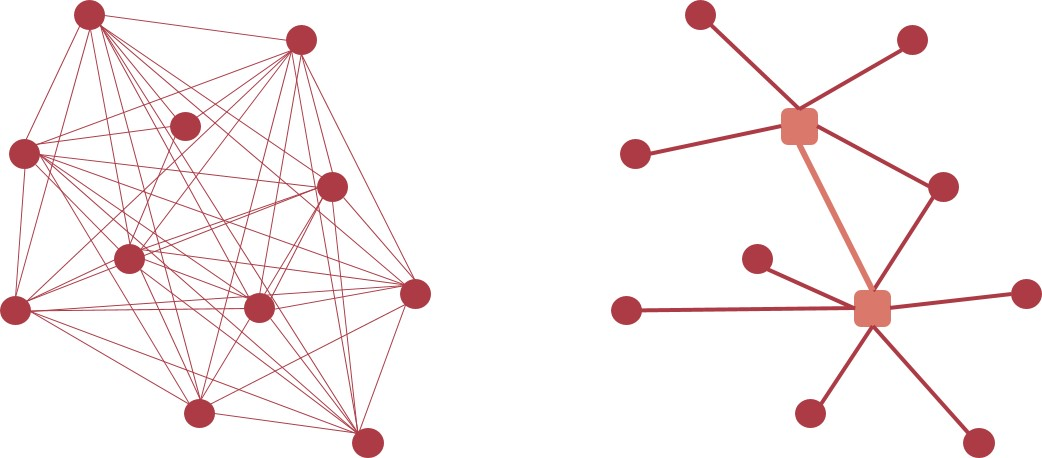

Выделяют следующие преимущества использования сетей с хабами:

- Экономия на масштабе. Консолидация трафика на хабах позволяет сформировать большие потоки между хабами, что приводит к меньшим издержкам на трансфер;
- Сокращение затрат на установку соединений между "непопулярными" или труднодоступными направлениями;
- Повышение уровня сервиса за счет более регулярных отправок;
- Сокращение затрат на управление сетью.

## Предположения

В 1986 году Мортон О'Келли впервые сформулировал математическую постановку задачи в виде задачи квадратичного программирования. Основными предположениями задачи являются:
1. Удовлетворение всего спроса
2. Запрет на прямые соединения
3. Матрица затрат удовлетворяет неравенству треугольника $\Rightarrow$ поток проходит через $\leq2$ хаба
4. Стоимость организации ребра между узлами не учитывается
5. Эффект масштаба моделируется в виде фикс. скидки на прохождение потока между хабами

## Математическая модель

В задаче размещения хабов существует три типа моделей в виде задачи смешанного целочисленного линейного программирования. Рассмотрим две, наиболее популярных. Модели отличаются решающими переменными.

В одном случае переменная имеет 4 индекса, задача получается размерности $O(n^4)$ переменных и $O(n^3)$ ограничений, где $n$ - кол-во узлов в сети.

В другом случае, решающая переменная имеет 3 индекса, задача получается размерности $O(n^3)$ переменных и $O(n^2)$ ограничений.

4-индексная модель уступает 3-индексной по размерности и скорости поиска оптимального решения, но позволяет использовать разложения, в частности, разложение Бендерса, что в нек. случаях дает значительное преимущество.

## Общие обозначения

__Индексы__

$N={1,...,n}$ - мн-во узлов в сети

$K\subseteq N$ - мн-во узлов в сети, которые могут быть хабами

__Константы__

$w_{ij}$ - поток из i в j  
$f_i$ - установка хаба в i  
$d_{ij}$ - расстояние между i и j  
$\chi$ - стоимость консолидации потоков за ед. расстояния и ед. потока  
$\alpha$ - стоимость трансфера потоков  
$\delta$ - стоимость распределения потоков  
$O_i=\sum_{j\in N}w_{ij}$ - общий выход из i  
$D_i=\sum_{j\in N}w_{ji}$ - общий сток в i  
$F_{ijkl}=w_{ij}(\chi d_{ik}+\alpha d_{kl}+\delta d_{lj})$ - затраты на траспортировку по маршруту из i в j через k и l

Размещение хабов явл. целесообр., когда $\alpha<\chi$ и $\alpha<\delta$

__Переменные__

$z_{kk}$ - 1, если k - хаб  
$z_{ik}$ - привязка i к k

__Ограничения__

1. Каждый узел связан только с одним хабом
$$\sum_{k\in K}z_{ik}=1, \forall i\in N$$
2. Связь узловой точки с хабом возможна, только если узл. точка выбрана как хаб
$$z_{ij}\leq z_{kk}, \forall i\in N,k\in K$$

## 4-индексная модель 

__Переменные__

$x_{ijkl}$ - вещ., доля всего потока из i в j через k и l

__Ограничения__

- Весь поток из узла i в j должен проходить только через выбранный хаб:
$$\sum_{l\in K}x_{ijkl}=z{ik},\forall i,j\in N,k\in K$$
- Весь поток в узел j из i должен проходить только через связанный с этим узлом хаб:
$$\sum_{k\in K}x_{ijkl}=z{jl},\forall i,j\in N,l\in K$$

__Целевая функция__

$$\min\sum_k f_kz{kk}+\sum_{i,j\in N}\sum_{k,l\in K}F_{ijkl}x_{ijkl}$$

## 3-индексная модель 

__Переменные__

$y_{ikl}$ - вещ., поток из i через k и l

__Ограничения__

- Балансирование потоков. Если свести баланс потоков в уравнение:
$$O_ix_{ik}+\sum_{l\in K}y_{ilk}=\sum_{j\in N}w_{ij}x_{jk}+\sum_{l\in K}y_{ikl},\forall i\in N,k\in K$$

__Целевая функция__

$$\min\sum_k f_kz_{kk}+\sum_{i\in N,k\in K}(\chi O_i+\delta D_i)d_{ik}z_{ik}+\sum_{k,l\in K}\alpha d_{kl}y_{ikl}$$

## Данные

Задачу размещения хабов можно решать методами линейного программирования, квадратичного программирования, эвристическими или мета-эвристическими методами. Оценку производительности и проведение сравнительного анализа подходов к решению между собой необходимо проводить на фиксированном наборе данных.

В научной среде часто исп. наборы:
- Civil Aeronautic Board.
- Australia Post
- Turkish Network

## Результат

Оптимальное решение для обоих вариантов получилось одинаковым., но за разное время: 450 и 18 сек для 4-х и 3-индексной соотв. Значения целевых функций 1133.54, а транспортные затраты с учетом дисконта $\alpha$ равны 794.56, что соответствует значениям других исследователей. 

Размерность задачи для 4-индексной версии - __31875__ ограничений и __391250__ переменных. Размерность задачи для 3-индексной версии - __1875__ ограничений и __15625__ переменных. При таком явном преимуществе 3-индексной модели 4-индексная версия по прежнему активно используется в теории и на практике, благодаря возможности применять эвристики и различного рода разложения.

## Эффект масштаба

Одним из предположений классической постановки задачи размещения хабов является постоянная скидка на трансфер потоков между хабами. Одним из направлений в этой области является уход от классической постановки учета скидки к другим моделям:
- Нелинейная ф-ия или кусочно-линейная ф-ия скидки
- Использование пороговых значений (кусочно-постоянная ф-ия)
- Учёт в модели дискретных единиц транспорта
- Разложение ф-ии затрат на постоянную и переменную часть

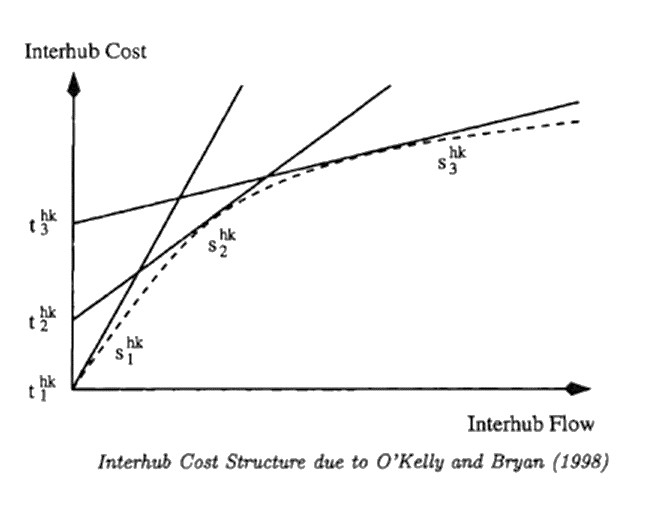

## Вариации постановок 

Можно выделить два направления развития: добавление правил в рамках классической постановки и концептуальный подход к моделированию. К первому относятся такие модификации как:
- Ограничение на узлы, которые потенциально могут стать хабами. Учет пропускной способности хабов;
- Ограничения на связи: связь с одним, несколькими или r-связей с хабами. Допуск прямых соединений, другие ограничения на маршрутизацию потоков;
- Сеть хабов является полным/неполным графом, формирует топологию типа звезда, кольца, древовидную или др. Учет различных типов соединений.

К концептуальным вариациям относятся сами подходы моделирования:
- Стохастические модели;
- Робастное размещение хабов в сети;
- Динамическое/многопериодное размещение хабов;
- Размещение хабов с учетом заторов;
- Размещение хабов в условиях конкуренции;
- Надежное размещение хабов в сети;
- Размещение хабов с целевой функцией максимизации прибыли;
- Размещение хабов и маршрутизация.